# Data Exploration

Before you start training a machine learning model, it is always a good idea to understand the distribution of your data in your training and development set.<br>

Please write code to answer the following questions:<br>

    1. What is the distribution of the NER labels? How many instances do you have per class?
       What class is best represented? For which class do you have the least amount of data?

    2. What features could be informative for the task? Formulate hypotheses about linguistic (or orthographic) features and test them by exploring their distribution in the data. 
    
Please explore at least three different aspects. For example, you can look into the following:<br>
        • Use the linguistic information already included in the dataset<br>
        • Look into orthographic features<br>
        • Explore the most common words per category

In [1]:
import csv
import pandas as pd
# csv is a useful package to deal with comma or tab separated values (such as conll). 
# It does not have quite the same functionality as pandas, but is easier to work with
import collections
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

nlp.max_length = 1699664 #1030000

In [2]:
def read_in_conll_file(path, delimiter='\t'):
    
    '''
    Read in conll file and return structured object
    
    :param conll_file: path to conll_file
    :param delimiter: specifies how columns are separated. Tabs are standard in conll
    
    :returns a list of information included in conll file
    '''

    all_sentences = list()

    with open(path) as file:
        infile = csv.reader(file, delimiter='\t',quotechar='|')
        for row in infile:
            all_sentences.append(row)
        
    return all_sentences

In [3]:
path_dev = "datas/conll2003.dev.conll"
dev_sentences = read_in_conll_file(path_dev)
dev_data = pd.DataFrame(dev_sentences)
dev_data.head()

,0,1,2,3
0,CRICKET,NNP,B-NP,O
1,-,:,O,O
2,LEICESTERSHIRE,NNP,B-NP,B-ORG
3,TAKE,NNP,I-NP,O
4,OVER,IN,B-PP,O


In [4]:
path_train = "datas/conll2003.train.conll"
all_sentences = read_in_conll_file(path_train)
train_data = pd.DataFrame(all_sentences)
train_data.head()

,0,1,2,3
0,EU,NNP,B-NP,B-ORG
1,rejects,VBZ,B-VP,O
2,German,JJ,B-NP,B-MISC
3,call,NN,I-NP,O
4,to,TO,B-VP,O


The first item on each line is a word, the second is a *part-of-speech* (POS) tag, the third is a syntactic chunk tag, and the fourth is the *named entity tag*. Therefore I will extract the words along with their named entities.

In [5]:
df_dev = dev_data[[0, 3]]
df_dev = df_dev.rename(columns={0: "word", 3: "ner"})
df_dev.head(20)

,word,ner
0,CRICKET,O
1,-,O
2,LEICESTERSHIRE,B-ORG
3,TAKE,O
4,OVER,O
5,AT,O
6,TOP,O
7,AFTER,O
8,INNINGS,O
9,VICTORY,O


In [6]:
df_train = train_data[[0, 3]]
df_train = df_train.rename(columns={0: "word", 3: "ner"})
df_train.head(20)

,word,ner
0,EU,B-ORG
1,rejects,O
2,German,B-MISC
3,call,O
4,to,O
5,boycott,O
6,British,B-MISC
7,lamb,O
8,.,O
9,None,None


In [7]:
df_train = df_train.dropna(axis=0, how='all') # remove None
df_dev = df_dev.dropna(axis=0, how='all') # remove None

df_train.head(20)

,word,ner
0,EU,B-ORG
1,rejects,O
2,German,B-MISC
3,call,O
4,to,O
5,boycott,O
6,British,B-MISC
7,lamb,O
8,.,O
10,Peter,B-PER


In [8]:
print(len(df_train))
print(len(df_dev))

203621
51362


In [9]:
#print(df_train["word"].dtype)
df_train["word"] = df_train["word"].astype(str)

In [10]:
# What is the distribution of the NER labels in train data

df_train["ner"].value_counts()

O         169578
B-LOC       7140
B-PER       6600
B-ORG       6321
I-PER       4528
I-ORG       3704
B-MISC      3438
I-LOC       1157
I-MISC      1155
Name: ner, dtype: int64

In [11]:
# What is the distribution of the NER labels in dev data

df_dev["ner"].value_counts()

O         42759
B-PER      1842
B-LOC      1837
B-ORG      1341
I-PER      1307
B-MISC      922
I-ORG       751
I-MISC      346
I-LOC       257
Name: ner, dtype: int64

In [12]:
df_train["ner"].value_counts() / len(df_train)

O         0.832812
B-LOC     0.035065
B-PER     0.032413
B-ORG     0.031043
I-PER     0.022237
I-ORG     0.018191
B-MISC    0.016884
I-LOC     0.005682
I-MISC    0.005672
Name: ner, dtype: float64

In [13]:
df_dev["ner"].value_counts() / len(df_dev)

O         0.832503
B-PER     0.035863
B-LOC     0.035766
B-ORG     0.026109
I-PER     0.025447
B-MISC    0.017951
I-ORG     0.014622
I-MISC    0.006736
I-LOC     0.005004
Name: ner, dtype: float64

We can see that O tag has more instance in train data than dev data. However, since dev data has greater size than train data, the distribution of O tag in train data is less than dev data.

In [14]:
sentences = []

for i in df_train["word"]:
    sentences.append(i)

print(sentences[:10])

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.', 'Peter']


In [15]:
df_new = df_train[:50000]
df_new.head(20)

,word,ner
0,EU,B-ORG
1,rejects,O
2,German,B-MISC
3,call,O
4,to,O
5,boycott,O
6,British,B-MISC
7,lamb,O
8,.,O
10,Peter,B-PER


In [16]:
dev_small_data = df_dev[:50000]
dev_small_data.head(20)

,word,ner
0,CRICKET,O
1,-,O
2,LEICESTERSHIRE,B-ORG
3,TAKE,O
4,OVER,O
5,AT,O
6,TOP,O
7,AFTER,O
8,INNINGS,O
9,VICTORY,O


In [17]:
tokens_train = nlp(''.join(str(df_new.word.tolist())))
tokens_dev = nlp(''.join(str(df_dev.word.tolist())))

### Train data most common features for first 50000 data

In [18]:
# Extracting the most common entities
items = [x.text for x in tokens_train.ents]
Counter(items).most_common(30)

[('Thursday', 141),
 ("1996-08-22'", 125),
 ('U.S.', 112),
 ('first', 101),
 ('Friday', 98),
 ("1996-08-23'", 97),
 ("'year'", 82),
 ("'1'", 66),
 ('Wednesday', 52),
 ('Australia', 51),
 ('second', 45),
 ('Germany', 43),
 ('Spain', 42),
 ("'week'", 41),
 ('1996', 41),
 ('Russia', 40),
 ('Britain', 39),
 ('China', 38),
 ("'2'", 38),
 ('third', 37),
 ('German', 36),
 ('India', 36),
 ('Sweden', 35),
 ('August', 34),
 ("'years'", 34),
 ('British', 31),
 ('France', 30),
 ('LONDON', 29),
 ('Newsroom', 29),
 ("'4'", 29)]

In [19]:
# Extracting people (real and fictional) using the PERSON type

person_list = []
for ent in tokens_train.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [20]:
df_person

,text,count
0,Attendance,16
1,Jordan,15
2,Michael,15
3,Ahmed,14
4,Johnson,13
5,Younis,12
6,Arafat,11
7,Todd,11
8,Davis,9
9,Patrick,9


In [21]:
# Extracting locations using the LOC type

loc_list = []
for ent in tokens_train.ents:
    if ent.label_ == 'LOC':
        loc_list.append(ent.text)
        
loc_counts = Counter(loc_list).most_common(20)
df_loc = pd.DataFrame(loc_counts, columns =['text', 'count'])

In [22]:
df_loc

,text,count
0,Africa,11
1,Europe,9
2,Kashmir,5
3,Mideast,5
4,Marina,3
5,Caribbean,2
6,Atlantic,2
7,Strip,1
8,Asia,1


In [23]:
# Extracting companies,organizations using the ORG type

org_list = []
for ent in tokens_train.ents:
    if ent.label_ == 'ORG':
        org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['text', 'count'])
df_org

,text,count
0,Newsroom,29
1,Reuters,28
2,Lauck,13
3,EPS,13
4,EU,12
5,Qualifier,9
6,BALTIMORE,8
7,Dhaka,8
8,AG,7
9,Royal',7


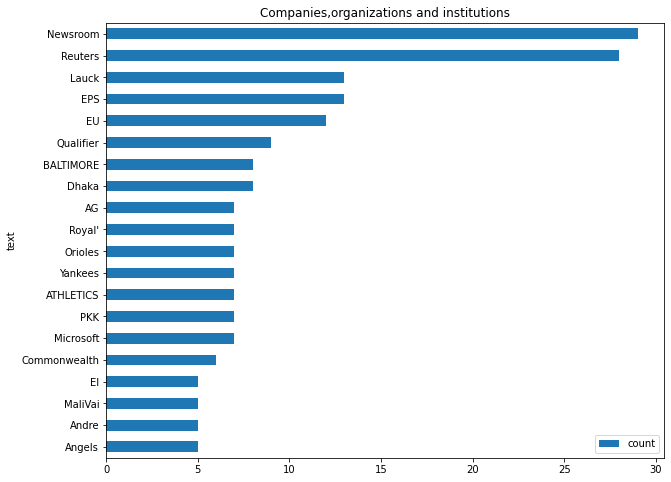

In [24]:
df_org.plot.barh(x='text', y='count', title="Companies,organizations and institutions", figsize=(10,8)).invert_yaxis()

In [27]:
# Extracting the most common entities
items_dev = [x.text for x in tokens_dev.ents]
Counter(items_dev).most_common(30)

[("'1'", 278),
 ("'2'", 205),
 ("'4'", 191),
 ('U.S.', 130),
 ('Friday', 121),
 ('Saturday', 120),
 ("1996-08-31'", 110),
 ("1996-08-30'", 98),
 ('first', 76),
 ('second', 57),
 ("'7'", 53),
 ('July', 51),
 ('Thursday', 50),
 ("'year'", 49),
 ('Germany', 47),
 ('Russia', 45),
 ("'week'", 45),
 ('France', 44),
 ('third', 40),
 ('Iraqi', 39),
 ("'years'", 38),
 ('September', 37),
 ("'9'", 35),
 ('6', 35),
 ('China', 32),
 ('Australia', 29),
 ('Iraq', 29),
 ('Israel', 29),
 ('Chechnya', 28),
 ('August', 26)]

In [28]:
# Extracting people (real and fictional) using the PERSON type

person_list_dev = []
for ent in tokens_dev.ents:
    if ent.label_ == 'PERSON':
        person_list_dev.append(ent.text)
        
person_counts_dev = Counter(person_list_dev).most_common(20)
df_person_dev = pd.DataFrame(person_counts_dev, columns =['text', 'count'])
df_person_dev

,text,count
0,Michael,20
1,Clinton,20
2,Yeltsin,19
3,Attendance,16
4,Arbil,16
5,Surrey,12
6,Dole,12
7,Jordan,12
8,Edberg,11
9,Arafat,11


In [29]:
# Extracting locations using the LOC type

loc_list_dev = []
for ent in tokens_dev.ents:
    if ent.label_ == 'LOC':
        loc_list_dev.append(ent.text)
        
loc_counts_dev = Counter(loc_list_dev).most_common(20)
df_loc_dev = pd.DataFrame(loc_counts_dev, columns =['text', 'count'])
df_loc_dev

,text,count
0,Africa,13
1,Europe,8
2,Midwest,7
3,Atlantic,3
4,Arctic,3
5,Mediterranean,2
6,Asia,1


In [30]:
# Extracting companies,organizations using the ORG type

org_list_dev = []
for ent in tokens_dev.ents:
    if ent.label_ == 'ORG':
        org_list_dev.append(ent.text)
        
org_counts_dev = Counter(org_list_dev).most_common(20)
df_org_dev = pd.DataFrame(org_counts_dev, columns =['text', 'count'])
df_org_dev

,text,count
0,Reuters,23
1,Wang,23
2,U.N.,17
3,KDP,12
4,OSCE,11
5,Fed,10
6,Treasury,9
7,Bristol,8
8,Parnevik,8
9,NATO,8


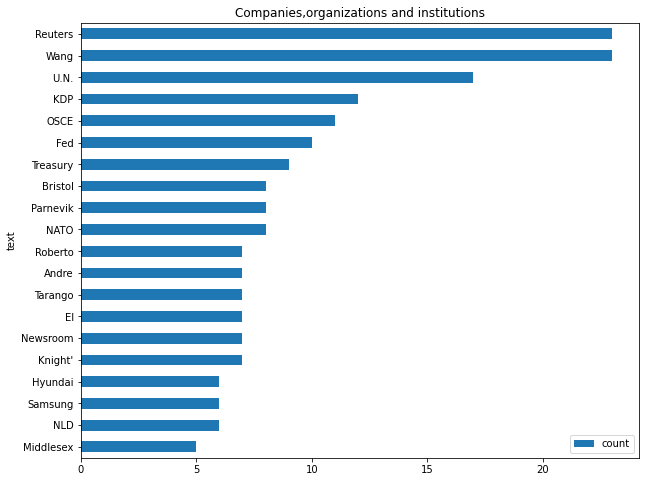

In [31]:
df_org_dev.plot.barh(x='text', y='count', title="Companies,organizations and institutions", figsize=(10,8)).invert_yaxis()